In [209]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import sklearn.metrics as metrics

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv("Train.csv")

In [212]:
target_sort = df.sort_values("target", ascending = False)

In [213]:
target_sort.head()

ward  total_households  total_individuals     target  \
1168  52404016: Ward 16        1812.84373         8968.41740  55.528423   
1619   93403001: Ward 1        4453.24928        17416.69214  52.601169   
1164  52404012: Ward 12        2138.10995         8431.81681  52.248392   
1165  52404013: Ward 13        1944.47033         7882.14294  52.171511   
1158   52404006: Ward 6        2149.91372        10155.40878  52.010403   

         dw_00     dw_01     dw_02     dw_03     dw_04     dw_05  ...  \
1168  0.142060  0.776898  0.014414  0.000000  0.000564  0.000000  ...   
1619  0.752216  0.241857  0.000242  0.000865  0.000000  0.000000  ...   
1164  0.113834  0.845846  0.031394  0.000505  0.000000  0.000584  ...   
1165  0.104686  0.863125  0.014763  0.000000  0.001112  0.000000  ...   
1158  0.181691  0.784911  0.020055  0.001843  0.001057  0.000000  ...   

         pw_03     pw_04     pw_05     pw_06  pw_07  pw_08  ADM4_PCODE  \
1168  0.038813  0.011813  0.043744  0.775224      0      0   ZA5244016   
1619  0.195580  0.049354  0.038661  0.033473      0      0   ZA9343001   
1164  0.048340  0.053918  0.007087  0.762259      0      0   ZA5244012   
1165  0.004201  0.000000  0.001285  0.955767      0      0   ZA5244013   
1158  0.046107  0.023015  0.006049  0.452690      0      0   ZA5244006   

            lat        lon        NL  
1168 -28.606415  30.547898  0.000000  
1619 -22.814838  30.294578  2.195359  
1164 -28.400486  30.423585  0.000000  
1165 -28.786121  30.606984  0.000000  
1158 -28.756320  30.304990  0.156689  

[5 rows x 63 columns]

<AxesSubplot:xlabel='target', ylabel='Count'>

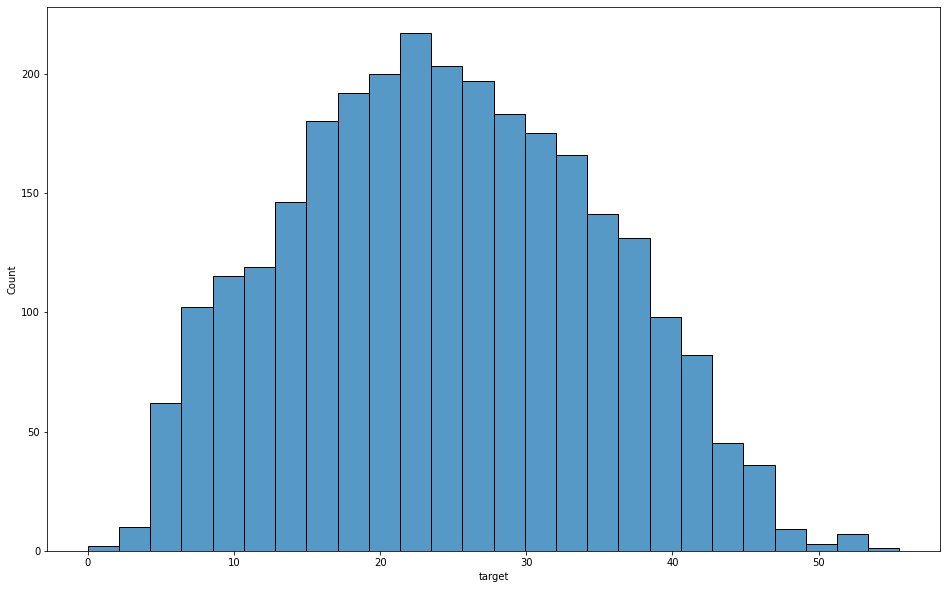

In [214]:
sns.histplot(df["target"])

In [215]:
df.target.describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [216]:
df.target.median()

24.15666997865

In [217]:

# create bins 

bin_labels = ['low', 'medium', 'high']
df['target_bin'] = pd.qcut(df['target'],
                              q=3,
                              labels=bin_labels)

In [218]:
corr = df.corr()

# __Create baseline model__

get variables which correlate > 0.5 with target 

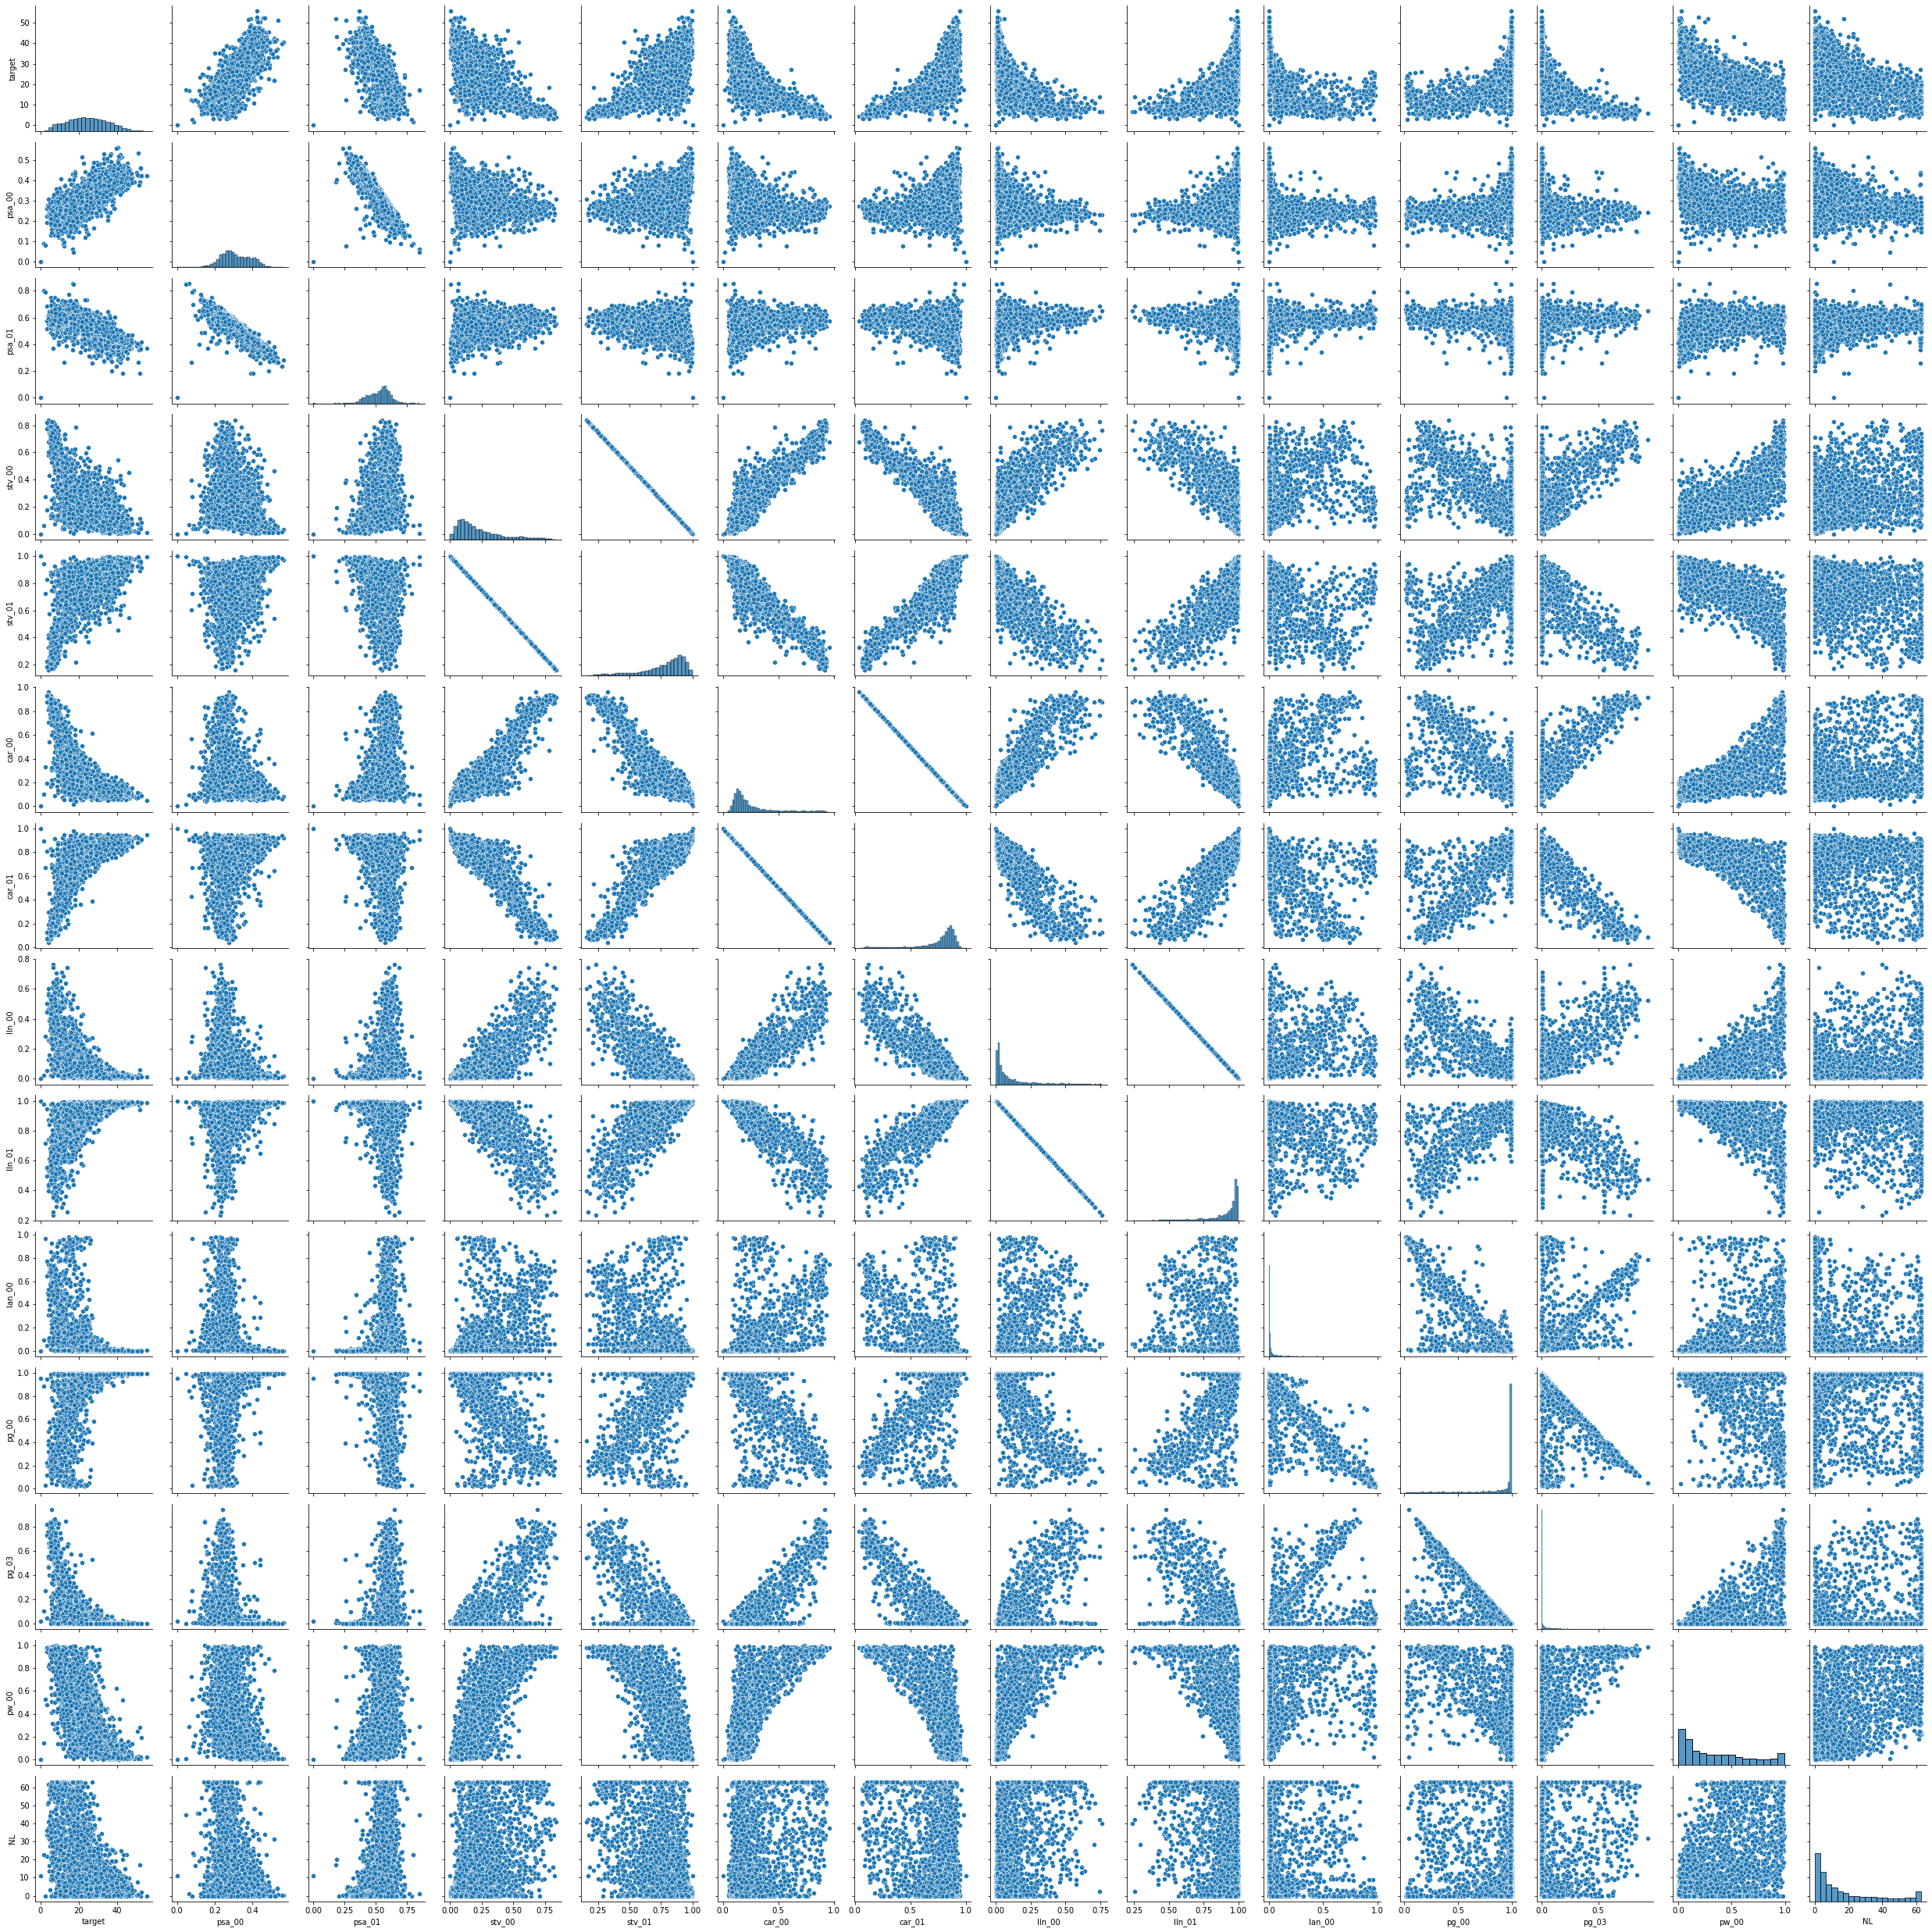

In [219]:
#correlation
corr = df.corr()
corr.head()
corr_price_p = corr[abs(corr["target"]) > 0.5]
corr_price_p.sort_values("target")

#index to list

corr_list_p = corr_price_p.index.values.tolist()
corr_list_p

#subset data frame to those which correlate with price
df_corr_p = df.loc[:,corr_list_p] # :, to access columns

#make pairplot
sns.pairplot(df_corr_p)

In [220]:
#list of features with correlation > 0.5 to target
corr_list_p

#drop target
#corr_list_p.remove("target")
corr_list_p

['target',
 'psa_00',
 'psa_01',
 'stv_00',
 'stv_01',
 'car_00',
 'car_01',
 'lln_00',
 'lln_01',
 'lan_00',
 'pg_00',
 'pg_03',
 'pw_00',
 'NL']

In [221]:


#define X and y values
X = df[corr_list_p]
y = df["target"]

#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X, y)
y_train_pred = lm.predict(X)

#evaluation metrics
print(f"MSE: {mean_squared_error(y, y_train_pred)}")
print(f"R2: {r2_score(y, y_train_pred)}")
print("AIC?")

MSE: 6.29696781699332e-28
R2: 1.0
AIC?


# __baseline model with 1 feature__

In [222]:
#target = psa_01 (low percentage of school education)

RSEED = 1

#read data train 
df = pd.read_csv("Train.csv")

#define X and y values

X = df[["psa_01"]]
y = df["target"]

#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X, y)

#prediction on training data
y_train_pred = lm.predict(X_train)

#prediction on test data
y_test_pred = lm.predict(X_test)

#evaluation metrics train
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print("AIC?")

#evaluation metrics test
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print("AIC?")

MSE: 55.157054981668566
R2: 0.48722673452820775
RMSE: 7.426779583484929
AIC?
MSE: 47.66562200822449
R2: 0.5333091967950967
RMSE: 6.904029403777513
AIC?


<AxesSubplot:xlabel='car_00', ylabel='Count'>

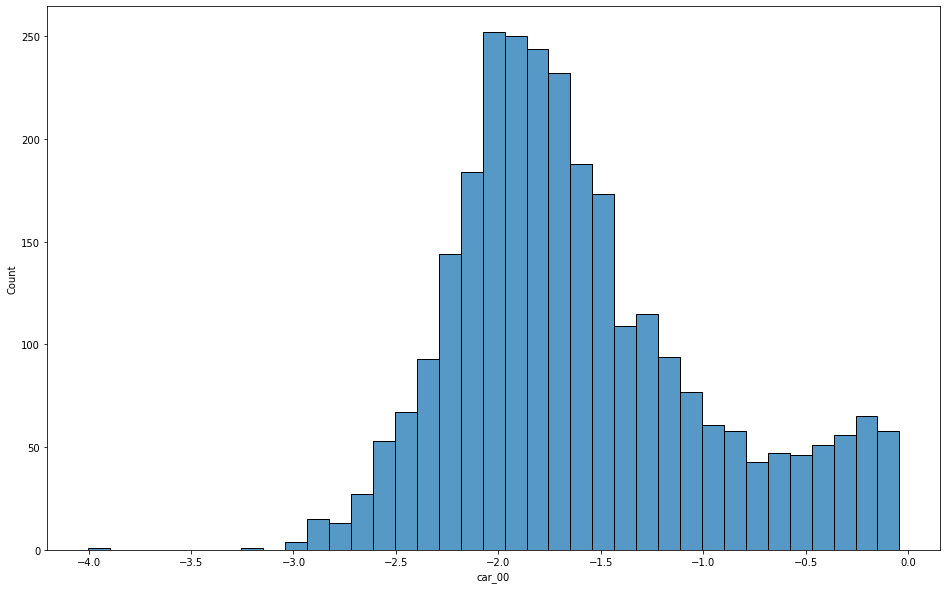

In [223]:
#logarithm

cars_log = np.log(df['car_00'])
sns.histplot(cars_log)

# __linear model with "whole" data:__

In [224]:
RSEED = 1

#read data train 
df = pd.read_csv("Train.csv")

#define X and y values
X = df.drop("target", axis =1)
X = X.drop(["ward","ADM4_PCODE"], axis = 1)
y = df["target"]

#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X, y)

#prediction on training data
y_train_pred = lm.predict(X_train)

#prediction on test data
y_test_pred = lm.predict(X_test)

#evaluation metrics train
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print("AIC?")

#evaluation metrics test
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print("AIC?")

MSE: 14.333402454991843
R2: 0.8667480418486762
RMSE: 3.785948025923209
AIC?
MSE: 14.03640982646363
R2: 0.8625704837147573
RMSE: 3.746519695192277
AIC?


__Residualplots__

In [225]:
residuals = y_test - y_test_pred

<AxesSubplot:xlabel='target', ylabel='target'>

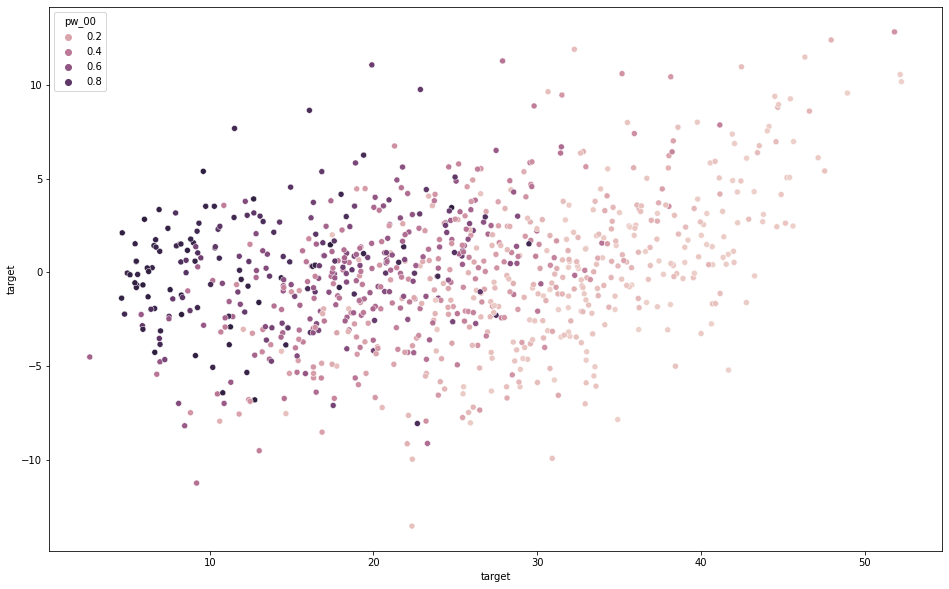

In [226]:
#residual plot test data

residuals
sns.scatterplot(y_test, residuals, hue = X_test["pw_00"])

In [227]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     342.8
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:56:34   Log-Likelihood:                -7752.4
No. Observations:                2822   AIC:                         1.561e+04
Df Residuals:                    2769   BIC:                         1.593e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
total_households      0.0001      0.000      1.295      0.195    -7.2e-05       0.000
total_individuals -6.791e-05   3.46e-05     -1.960      0.050      -0.000    2.28e-08
dw_00             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_01             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_02             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_03             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_04             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_05             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_06             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_07             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_08             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_09             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_10             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_11             -3.591e+07   5.27e+07     -0.682      0.495   -1.39e+08    6.74e+07
dw_12               184.1665    212.897      0.865      0.387    -233.287     601.620
dw_13               -86.7723    100.384     -0.864      0.387    -283.608     110.064
psa_00            -1.943e+07   1.62e+07     -1.201      0.230   -5.12e+07    1.23e+07
psa_01            -1.943e+07   1.62e+07     -1.201      0.230   -5.12e+07    1.23e+07
psa_02            -1.943e+07   1.62e+07     -1.201      0.230   -5.12e+07    1.23e+07
psa_03            -1.943e+07   1.62e+07     -1.201      0.230   -5.12e+07    1.23e+07
psa_04            -1.943e+07   1.62e+07     -1.201      0.230   -5.12e+07    1.23e+07
stv_00             3.258e+07   2.33e+07      1.398      0.162   -1.31e+07    7.83e+07
stv_01             3.258e+07   2.33e+07      1.398      0.162   -1.31e+07    7.83e+07
car_00             3.273e+07   2.35e+07      1.395      0.163   -1.33e+07    7.88e+07
car_01             3.273e+07   2.35e+07      1.395      0.163   -1.33e+07    7.88e+07
lln_00             3.258e+07   2.33e+07      1.398      0.162   -1.31e+07    7.83e+07
lln_01             3.258e+07   2.33e+07      1.398      0.162   -1.31e+07    7.83e+07
lan_00             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07    2.73e+07
lan_01             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07    2.73e+07
lan_02             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07    2.73e+07
lan_03             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07    2.73e+07
lan_04             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07    2.73e+07
lan_05             7.757e+06   9.98e+06      0.777      0.437   -1.18e+07

In [228]:
high_target = df[df.target_bin == "high"]
high_target.head()

AttributeError: 'DataFrame' object has no attribute 'target_bin'

In [ ]:
# plot zipcodes on map

import plotly.graph_objects as go
import plotly.express as px

color = ["red" for i in range(0,len(df["ward"]))]

  
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=3, height=500, size = "target", size_max = 10, color_discrete_sequence=['red'])
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=8, mapbox_center_lat = -28.606415, mapbox_center_lon = 30.547898, margin={"r":0,"t":50,"l":0,"b":0}, title = 'zipcodes', )

fig.show()